# Read in data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pickle

In [15]:
# Read in data
df = pd.read_csv('../Data/preprocessedData.csv')
df.head()

,Age,Height,Weight,Veg_Consump,Water_Consump,Meal_Count,Phys_Act,Time_E_Dev,Gender_Female,Gender_Male,...,Fam_Hist_no,Fam_Hist_yes,H_Cal_Burn_no,H_Cal_Burn_yes,Transport_Automobile,Transport_Bike,Transport_Motorbike,Transport_Public_Transportation,Transport_Walking,Body_Level
0,22.547298,1.722461,51.881263,2.663421,1.041110,3.000000,0.794402,1.391948,1,0,...,0,1,1,0,0,0,0,1,0,Body Level 1
1,19.799054,1.743702,54.927529,2.000000,2.847264,3.289260,1.680844,2.000000,0,1,...,0,1,1,0,0,0,0,1,0,Body Level 1
2,17.823438,1.708406,50.000000,1.642241,1.099231,3.452590,0.418875,1.000000,1,0,...,1,0,1,0,0,0,0,1,0,Body Level 1
3,19.007177,1.690727,49.895716,1.212908,1.029703,3.207071,2.000000,1.000000,1,0,...,1,0,1,0,0,0,0,1,0,Body Level 1
4,19.729250,1.793315,58.195150,2.508835,2.076933,3.435905,2.026668,1.443328,0,1,...,0,1,1,0,1,0,0,0,0,Body Level 1


In [16]:
# the target is Body_Level
X = df.drop('Body_Level', axis=1)
y = df['Body_Level']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## cross validation
* The available data is divided into k equal-sized folds (subsets).
* The model is trained on k-1 folds of the data, and the remaining fold is kept as a validation set.
* The performance of the model is evaluated on the validation set (the fold that was not used for training).
* Steps 2 and 3 are repeated k times, each time using a different fold as the validation set.
* The performance results from all k iterations are averaged or combined to obtain a more robust estimate of the model's performance.

## logisitic regression

In [44]:
# Create an LogisticRegression classifier
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

# classification report
print(classification_report(y_test, y_pred))


# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy of logistic regression classifier on test set: 0.78
              precision    recall  f1-score   support

Body Level 1       0.84      0.83      0.84       136
Body Level 2       0.67      0.74      0.70       133
Body Level 3       0.75      0.69      0.72       143
Body Level 4       0.85      0.86      0.85       132

    accuracy                           0.78       544
   macro avg       0.78      0.78      0.78       544
weighted avg       0.78      0.78      0.78       544

Confusion Matrix:
[[113  23   0   0]
 [ 21  98  14   0]
 [  0  25  98  20]
 [  0   0  19 113]]


c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Logistic regression Hyperparameters 

**Regularization in logistic regression helps prevent overfitting by adding a penalty term to the loss function. The penalty term discourages the model from assigning high weights to features, which can lead to overfitting. By increasing the regularization strength (decreasing C), the penalty on the weights becomes stronger, resulting in smaller weight values.**

**Smaller weights imply that the influence of individual features on the decision boundary is reduced. This can lead to a simpler and more generalized model that is less likely to overfit the training data**

>C 
* The C hyperparameter controls the inverse of regularization strength in logistic regression.
* Regularization is a technique used to prevent overfitting by **adding a penalty term to the loss function.**
* In logistic regression,**a smaller value of C increases the regularization strength,** making the model less tolerant of misclassifications.
* Conversely, a larger value of C decreases the regularization strength, making the model more tolerant of misclassifications.
* Choosing the appropriate value of C is crucial to balance the trade-off between underfitting and overfitting.

>penalty
* 'l2': It adds an L2 penalty term to the loss function, which promotes smaller weights in the model.
* **loss = (1/N) * sum(log(1 + exp(-y_i * (w^T * x_i))) + (C/2) * sum(w^2)**
* 'l1': It adds an L1 penalty term to the loss function, which promotes sparsity by driving some weights to exactly zero.
* **loss = (1/N) * sum(log(1 + exp(-y_i * (w^T * x_i))) + C * sum(abs(w))**
>solver
* The solver hyperparameter specifies the algorithm used for optimization in logistic regression.
* ‘liblinear’ is limited to one-versus-rest schemes and suitable for **small-to-medium-sized datasets.**
* ‘saga’  handle multinomial loss and  suitable **for large datasets**
*  both supports L1 and L2 penalties


In [45]:
# Define the parameter grid
param_grid = {'C': [0.1, 1, 10],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga']}

# Create the logistic regression classifier
logreg = LogisticRegression()

# Perform grid search with cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Use the best model to make predictions
y_pred = best_model.predict(X_test)

# Print the accuracy and other metrics
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

Accuracy of logistic regression classifier on test set: 0.88
              precision    recall  f1-score   support

Body Level 1       0.98      1.00      0.99       136
Body Level 2       0.76      0.75      0.76       133
Body Level 3       0.79      0.78      0.78       143
Body Level 4       0.98      0.99      0.99       132

    accuracy                           0.88       544
   macro avg       0.88      0.88      0.88       544
weighted avg       0.88      0.88      0.88       544

Confusion Matrix:
[[136   0   0   0]
 [  3 100  30   0]
 [  0  30 111   2]
 [  0   1   0 131]]


## SVM

In [17]:
# Create an SVM classifier
clf = svm.SVC(kernel='linear',)

# Train the SVM classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9338235294117647
              precision    recall  f1-score   support

Body Level 1       0.93      1.00      0.96       136
Body Level 2       0.95      0.89      0.92       133
Body Level 3       0.93      0.89      0.91       143
Body Level 4       0.93      0.96      0.95       132

    accuracy                           0.93       544
   macro avg       0.93      0.93      0.93       544
weighted avg       0.93      0.93      0.93       544

Confusion Matrix:
[[136   0   0   0]
 [ 10 118   5   0]
 [  1   6 127   9]
 [  0   0   5 127]]


## SVM Hyperparameters 
>C 
* if c is small then the margin is large and the model is more tolerant of misclassifications
* if c is large then the margin is small and the model is less tolerant of misclassifications

>kernel
* SVM can use different types of kernels to transform the data into a higher-dimensional space, allowing for better separation of classes.
* linear kernel
* * The linear kernel is the simplest type of kernel. It represents a linear transformation of the input data into a higher-dimensional space. The linear kernel is suitable for linearly separable data, where the classes can be separated by a straight line or hyperplane.
* polynomial kernel
* * The polynomial kernel is a generalization of the linear kernel. It transforms the input data into a higher-dimensional space using a polynomial function. The polynomial kernel is suitable for non-linearly separable data, where the classes can be separated by a curved line or curved hyperplane.
* rbf kernel
* * The RBF kernel is a generalization of the polynomial kernel. It transforms the input data into a higher-dimensional space using a radial basis function. The RBF kernel is suitable for non-linearly separable data, where the classes can be separated by a curved line or curved hyperplane.

>gamma
* controls  the distance of influence of a single training example
* A small gamma value implies a large influence, while a large gamma value means a smaller influence. Higher values of gamma can lead to overfitting, so it's important to test different values and find an optimal balance.
* small gamma may lead to underfitting but better generalization
* large gamma may lead to overfitting but poor generalization
* gamma = 'auto' uses 1/n_features good for large datasets with many features
* gamma = 'scale' uses 1/(n_features * X.var()) good for small datasets and X.var() is the variance of the features

In [18]:
# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],  # The regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # The kernel type
    'gamma': ['scale', 'auto'],  # The kernel coefficient
}

# Create an SVM classifier
svm_model = svm.SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Train the SVM classifier with the best parameters
best_clf = svm.SVC(**best_params)
best_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Best Parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}
Best Score: 0.9894305599493831
Accuracy: 0.9926470588235294
              precision    recall  f1-score   support

Body Level 1       0.99      1.00      0.99       136
Body Level 2       1.00      0.99      1.00       133
Body Level 3       0.99      0.99      0.99       143
Body Level 4       0.99      0.99      0.99       132

    accuracy                           0.99       544
   macro avg       0.99      0.99      0.99       544
weighted avg       0.99      0.99      0.99       544

Confusion Matrix:
[[136   0   0   0]
 [  1 132   0   0]
 [  1   0 141   1]
 [  0   0   1 131]]


In [48]:
# save the model to disk
filename = '../Models/best_svm_model.sav'
pickle.dump(best_clf, open(filename, 'wb'))

In [36]:
# load the model from disk
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Make predictions on the test set
y_pred = loaded_model.predict(X_test)

print(f'y_pred: {y_pred}')

# save the predictions in a new csv file
df = pd.DataFrame(y_pred, columns=['Body_Level'])
df.to_csv('../Data/predictions.csv', index=False)


y_pred: ['Body Level 4' 'Body Level 3' 'Body Level 3' 'Body Level 2'
 'Body Level 4' 'Body Level 4' 'Body Level 2' 'Body Level 4'
 'Body Level 2' 'Body Level 2' 'Body Level 3' 'Body Level 4'
 'Body Level 1' 'Body Level 1' 'Body Level 2' 'Body Level 4'
 'Body Level 2' 'Body Level 3' 'Body Level 1' 'Body Level 1'
 'Body Level 4' 'Body Level 2' 'Body Level 4' 'Body Level 3'
 'Body Level 4' 'Body Level 4' 'Body Level 3' 'Body Level 2'
 'Body Level 4' 'Body Level 4' 'Body Level 1' 'Body Level 1'
 'Body Level 2' 'Body Level 4' 'Body Level 4' 'Body Level 1'
 'Body Level 2' 'Body Level 2' 'Body Level 1' 'Body Level 3'
 'Body Level 4' 'Body Level 4' 'Body Level 2' 'Body Level 1'
 'Body Level 2' 'Body Level 4' 'Body Level 4' 'Body Level 3'
 'Body Level 4' 'Body Level 2' 'Body Level 2' 'Body Level 4'
 'Body Level 1' 'Body Level 4' 'Body Level 2' 'Body Level 3'
 'Body Level 4' 'Body Level 1' 'Body Level 3' 'Body Level 2'
 'Body Level 2' 'Body Level 3' 'Body Level 2' 'Body Level 2'
 'Body Level 3' 

# Adaboost

In [4]:
# Create an AdaBoostClassifier with a DecisionTreeClassifier as the base estimator
ada_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
ada_classifier.fit(X_train, y_train)

y_pred = ada_classifier.predict(X_test)

# Calculate and print the accuracy of the AdaBoost classifier on the test set
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of AdaBoost classifier on test set: {:.2f}'.format(accuracy))

# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Accuracy of AdaBoost classifier on test set: 0.98
              precision    recall  f1-score   support

Body Level 1       1.00      1.00      1.00       136
Body Level 2       0.97      1.00      0.99       133
Body Level 3       0.97      0.97      0.97       143
Body Level 4       1.00      0.96      0.98       132

    accuracy                           0.98       544
   macro avg       0.98      0.98      0.98       544
weighted avg       0.98      0.98      0.98       544

Confusion Matrix:
[[136   0   0   0]
 [  0 133   0   0]
 [  0   4 139   0]
 [  0   0   5 127]]


c:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [7]:
# Create an AdaBoostClassifier with a DecisionTreeClassifier as the base estimator
ada_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

# Define the parameter grid for grid search with AdaBoost
param_grid = {
    'base_estimator__criterion': ['gini', 'entropy'],
    'base_estimator__max_depth': [None],
    'base_estimator__min_samples_split': [2, 5, 10],
    'base_estimator__min_samples_leaf': [1, 2, 4],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Perform grid search with cross-validation using AdaBoost
grid_search = GridSearchCV(ada_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and model from grid search
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)
print('Accuracy of AdaBoost classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

# Classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Print the best parameters found by grid search
print("Best Parameters:")
print(best_params)


c:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-p

Accuracy of AdaBoost classifier on test set: 0.99
              precision    recall  f1-score   support

Body Level 1       1.00      1.00      1.00       136
Body Level 2       1.00      0.98      0.99       133
Body Level 3       0.97      1.00      0.99       143
Body Level 4       1.00      0.98      0.99       132

    accuracy                           0.99       544
   macro avg       0.99      0.99      0.99       544
weighted avg       0.99      0.99      0.99       544

Confusion Matrix:
[[136   0   0   0]
 [  0 131   2   0]
 [  0   0 143   0]
 [  0   0   2 130]]
Best Parameters:
{'base_estimator__criterion': 'gini', 'base_estimator__max_depth': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 10, 'learning_rate': 1.0, 'n_estimators': 200}


### Adaboost Parameters
1. 'base_estimator__criterion': ['gini', 'entropy']:

- Specifies the function to measure the quality of a split in the decision tree.
It can take either 'gini' or 'entropy' as options.
The grid search will try different combinations of these criteria to find the best one.

2. 'base_estimator__max_depth': [None, 5, 10]:

- Defines the maximum depth of the decision tree.
None means there is no maximum depth, allowing the tree to grow until all leaves are pure or contain a minimum number of samples defined by other parameters.
The grid search will try different maximum depth values to find the best one.

3. 'base_estimator__min_samples_split': [2, 5, 10]:

- Specifies the minimum number of samples required to split an internal node.
The grid search will try different values for the minimum number of samples required to perform a split.

4. 'base_estimator__min_samples_leaf': [1, 2, 4]:

- Defines the minimum number of samples required to be at a leaf node.
The grid search will try different values for the minimum number of samples required to be at a leaf node.

5. 'n_estimators': [50, 100, 200]:

- Indicates the number of base estimators (decision trees) to be included in the AdaBoost ensemble.
The grid search will try different values for the number of estimators.

6. 'learning_rate': [0.1, 0.5, 1.0]:

- Determines the contribution of each base estimator to the ensemble.
A lower learning rate generally requires more estimators to achieve the same performance as a higher learning rate.
The grid search will try different learning rates to find the best one.

# Random Forest

In [51]:
# Create a Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

# Classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Accuracy of Random Forest classifier on test set: 0.98
              precision    recall  f1-score   support

Body Level 1       1.00      1.00      1.00       136
Body Level 2       0.94      0.98      0.96       133
Body Level 3       0.97      0.95      0.96       143
Body Level 4       1.00      0.98      0.99       132

    accuracy                           0.98       544
   macro avg       0.98      0.98      0.98       544
weighted avg       0.98      0.98      0.98       544

Confusion Matrix:
[[136   0   0   0]
 [  0 131   2   0]
 [  0   7 136   0]
 [  0   1   2 129]]


In [52]:
# # Create a Random Forest classifier
# rf = RandomForestClassifier()

# # Define the parameter grid for grid search
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt']
# }

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # Get the best parameters and model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# # Make predictions on the test set using the best model
# y_pred = best_model.predict(X_test)
# print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

# # Classification report
# print(classification_report(y_test, y_pred))

# # Print the confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(cm)

# # Print the best parameters
# print("Best Parameters:")
# print(best_params)


c:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Accuracy of Random Forest classifier on test set: 0.96
              precision    recall  f1-score   support

Body Level 1       1.00      0.99      1.00       136
Body Level 2       0.92      0.97      0.95       133
Body Level 3       0.96      0.91      0.93       143
Body Level 4       0.97      0.98      0.97       132

    accuracy                           0.96       544
   macro avg       0.96      0.96      0.96       544
weighted avg       0.96      0.96      0.96       544

Confusion Matrix:
[[135   1   0   0]
 [  0 129   4   0]
 [  0   9 130   4]
 [  0   1   2 129]]
Best Parameters:
{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


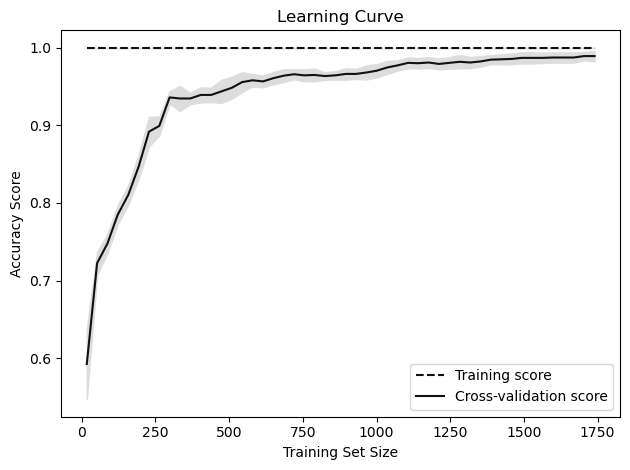

In [11]:
# discuss bais varaince tradeoff on svm model
# plot learning curve
from sklearn.model_selection import learning_curve
from matplotlib import pyplot as plt
train_sizes, train_scores, test_scores = learning_curve(best_clf, X_train, y_train, cv=5, scoring='accuracy',
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111", label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [25]:
# Bias-variance tradeoff decomposition
import numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from mlxtend.evaluate import bias_variance_decomp

# Initialize label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the target variable
y_train1_encoded = label_encoder.fit_transform(y_train)
y_test1_encoded = label_encoder.transform(y_test)

# Convert DataFrame to NumPy arrays
X_train1 = X_train.values
X_test1 = X_test.values

# Perform bias-variance decomposition
mse, bias, var = bias_variance_decomp(best_clf, X_train1, y_train1_encoded, X_test1, y_test1_encoded, loss='mse', num_rounds=200, random_seed=42)

print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)


MSE: 0.021
Bias: 0.011
Variance: 0.011
